In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import sys
sys.path.append("../../../../../src/")
import nanonets_utils
import nanonets

plt.style.use(["science","bright","grid"])

## String Temperature Dependce

In [98]:
folder      = "/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/frequency/"
# folder      = "/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/frequency/"
f_vals      = np.linspace(0.5,30,60)
time_step   = 1e-10
t_vals      = np.arange(199999)*time_step*1e9
data_string = {f0 : pd.read_csv(f"{folder}Nx=10_Ny=1_Nz=1_Ne=2_{np.round(f0,1)}.csv") for f0 in f_vals}

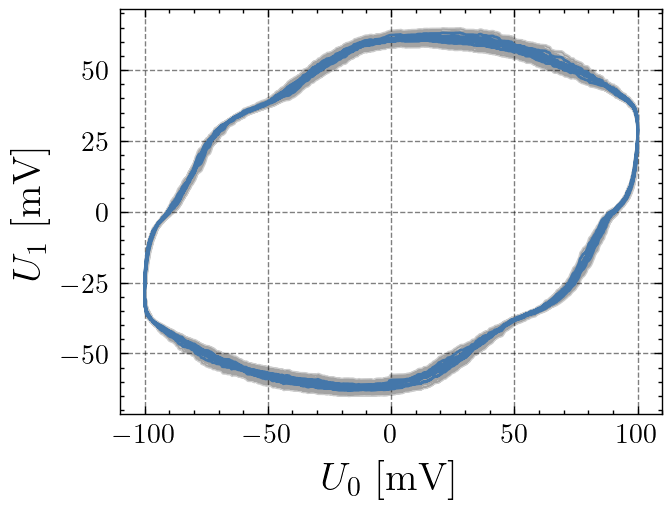

In [19]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()

f0      = 10.0
t_val   = t_vals.copy()
x_val   = data_string[f0]['E0'].values[-10000:]*1000
y_val   = data_string[f0]['Current'].values[-10000:]*1000
y_err   = data_string[f0]['Error'].values[-10000:]*1000
ax.plot(x_val, y_val)
ax.fill_between(x_val, y_val-y_err, y_val+y_err, alpha=0.2, color='black')
ax.set_xlabel("$U_0$ [mV]", fontsize='x-large')
ax.set_ylabel("$U_1$ [mV]", fontsize='x-large')

fig.savefig(f"../plots/ac_phase_space_N_{f0}.svg", transparent=True)

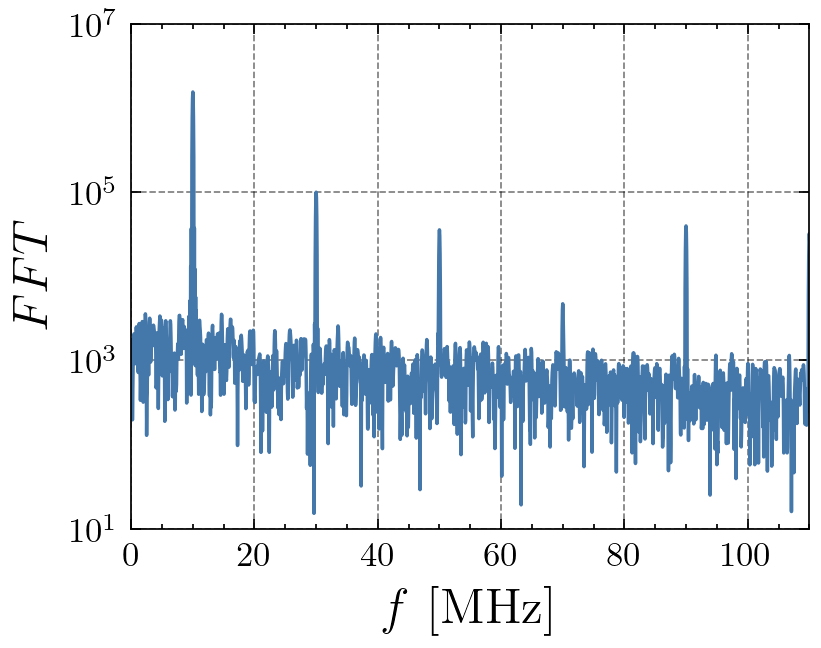

In [7]:
eq_step = 100000
f0      = 10.0 #1,3,7,10
t_val   = t_vals[:-eq_step].copy()
x_val   = data_string[f0]['E0'].values[eq_step:]*1000
y_val   = data_string[f0]['Current'].values[eq_step:]*1000
y_val   = y_val-np.mean(y_val)
xf, yf  = nanonets_utils.fft(signal=y_val, dt=time_step, n_padded=200000)
xf      = xf / 1e6
y_min   = 1e1
y_max   = 1e7

fig = plt.figure(dpi=250)
ax  = fig.add_subplot()
ax.plot(xf, yf)

# ax.vlines(f0, y_min, y_max, colors='black', ls='--', label='$f_0$')
# for i in range(2,10):
#     ax.vlines(i*f0, y_min, y_max, colors='grey', ls='--', label=f'${i} \cdot f_0$')

ax.set_yscale('log')
ax.set_xlim(0,11*f0)
ax.set_ylim(y_min,y_max)
ax.set_xlabel("$f$ [MHz]", fontsize='x-large')
ax.set_ylabel("$FFT$", fontsize='x-large')
# ax.legend(fontsize='xx-small', loc='upper right', ncol=3)
fig.savefig(f"../plots/ac_fft_N_{f0}.svg", transparent=True)

In [99]:
eq_step     = 100000
N_f         = 20
h_strength  = []

for f0 in f_vals[1:]:
    y_val   = data_string[f0]['Current'].values[eq_step:]*1000
    h_temp  = nanonets_utils.harmonic_strength(signal=y_val, f0=f0*1e6, dt=time_step, N_f=N_f, n_padded=0)
    h_strength.append(h_temp)

h_df    = pd.DataFrame(h_strength, columns=np.arange(2,N_f+2), index=f_vals[1:])
thd_v   = np.sqrt(np.sum(np.array(h_strength)**2, axis=1))
h_df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
1.0,0.001098,0.026092,0.001208,0.019336,0.000711,0.026908,0.000620,0.015720,0.000562,0.009484,0.000566,0.014605,0.000781,0.016490,0.000463,0.014228,0.000914,0.005937,0.000607,0.001201
1.5,0.001204,0.038418,0.000955,0.004772,0.000250,0.013091,0.000557,0.017483,0.000281,0.004019,0.000202,0.016902,0.000210,0.021607,0.000510,0.014935,0.000151,0.007906,0.000322,0.001683
2.0,0.000870,0.051432,0.000815,0.021846,0.000718,0.002208,0.000152,0.017379,0.000590,0.006576,0.000263,0.020902,0.000397,0.024300,0.000054,0.014049,0.000449,0.007457,0.000279,0.002703
2.5,0.000054,0.055052,0.000444,0.026015,0.000479,0.001520,0.000259,0.019985,0.000389,0.007410,0.000105,0.022599,0.000454,0.023019,0.000226,0.012591,0.000397,0.006382,0.000562,0.002330
3.0,0.000023,0.055783,0.000318,0.028184,0.000160,0.005045,0.000140,0.021048,0.000283,0.007254,0.000405,0.022530,0.000175,0.020320,0.000359,0.010058,0.000129,0.004911,0.000124,0.001515
3.5,0.000637,0.056524,0.000081,0.030588,0.000300,0.008607,0.000610,0.020467,0.000109,0.006941,0.000264,0.022156,0.000219,0.017631,0.000104,0.007230,0.000217,0.003199,0.000210,0.001207
4.0,0.000560,0.055810,0.000221,0.032657,0.000501,0.012565,0.000226,0.018182,0.000312,0.009161,0.000518,0.021369,0.000350,0.014625,0.000140,0.006163,0.000234,0.002750,0.000213,0.000906
4.5,0.000340,0.052443,0.000291,0.031653,0.000280,0.016502,0.000298,0.014986,0.000020,0.012408,0.000233,0.020848,0.000098,0.011983,0.000120,0.005267,0.000129,0.002463,0.000258,0.001012
5.0,0.000394,0.049576,0.000266,0.029339,0.000004,0.018997,0.000255,0.010970,0.000015,0.015356,0.000052,0.019907,0.000454,0.010760,0.000267,0.004942,0.000220,0.001940,0.000188,0.000815
5.5,0.000334,0.046353,0.001058,0.025607,0.000519,0.020226,0.000087,0.006702,0.000128,0.018218,0.000079,0.018955,0.000172,0.009503,0.000269,0.004336,0.000237,0.001389,0.000088,0.000022


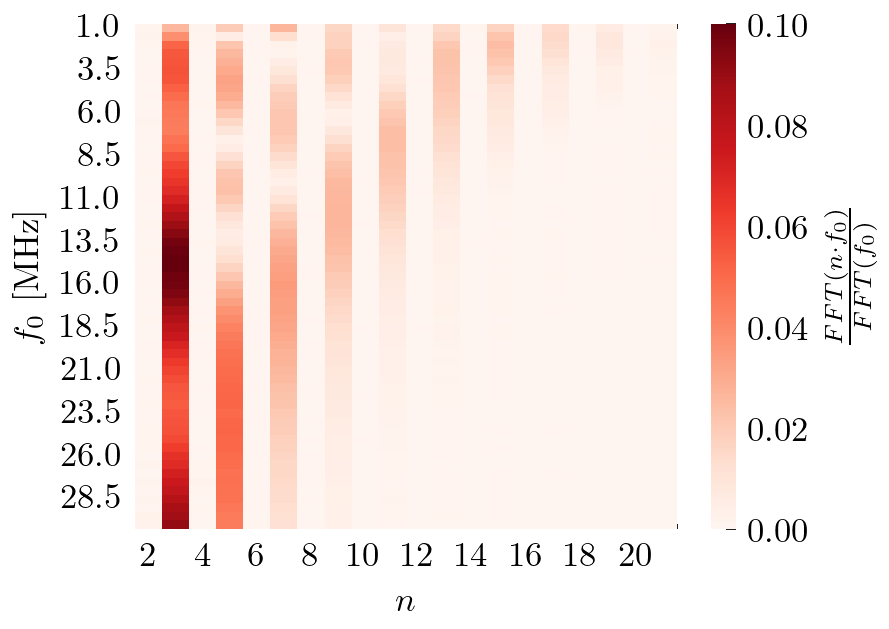

In [100]:
fig = plt.figure(dpi=250)
ax  = fig.add_subplot()
ax  = sns.heatmap(h_df, cmap='Reds', cbar_kws={"label":"$\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$"}, vmin=0, vmax=0.1)
ax.set_ylabel('$f_0$ [MHz]')
ax.set_xlabel("$n$")
plt.yticks(rotation=0)
fig.savefig(f"../plots/harmonic_strength.svg", transparent=True)

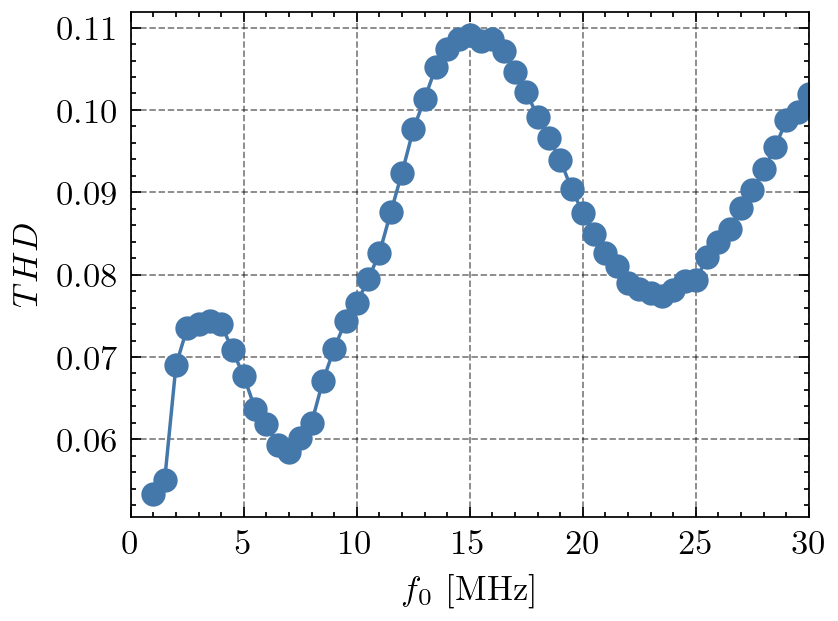

In [106]:
fig = plt.figure(dpi=250)
ax  = fig.add_subplot()
ax.plot(f_vals[1:], thd_v, 'o-')
ax.set_ylabel('$THD$')
# ax.set_xticks(f_vals[1::4])
ax.set_xlabel('$f_0$ [MHz]')
ax.set_xlim(0,30)
# ax.set_xticklabels(f_vals)
fig.savefig(f"../plots/thd.svg", transparent=True)

---

In [80]:
from scipy.optimize import curve_fit
def sin_func(t, A, f0, phi, B):
    return A*np.sin(2*np.pi*f0*t-phi) + B

In [81]:
N_samples   = 100
eq_steps    = 10000
time_step   = 1e-10
folder      = "/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/frequency_modulation/"
dic_sample  = {i : pd.read_csv(f"{folder}Nx=9_Ny=9_Nz=1_Ne=8_{i}.csv").iloc[eq_steps:,:].reset_index(drop=True) for i in range(N_samples)}
time_vals   = np.arange(len(dic_sample[0]))*time_step

In [82]:
phis    = []
t       = time_vals.copy()
for key, df in dic_sample.items():
    y       = df['Current'].values.copy()
    p, cov  = curve_fit(sin_func, t, y, p0=[0.1,3.5e6,0,0])
    phis.append(p[2])

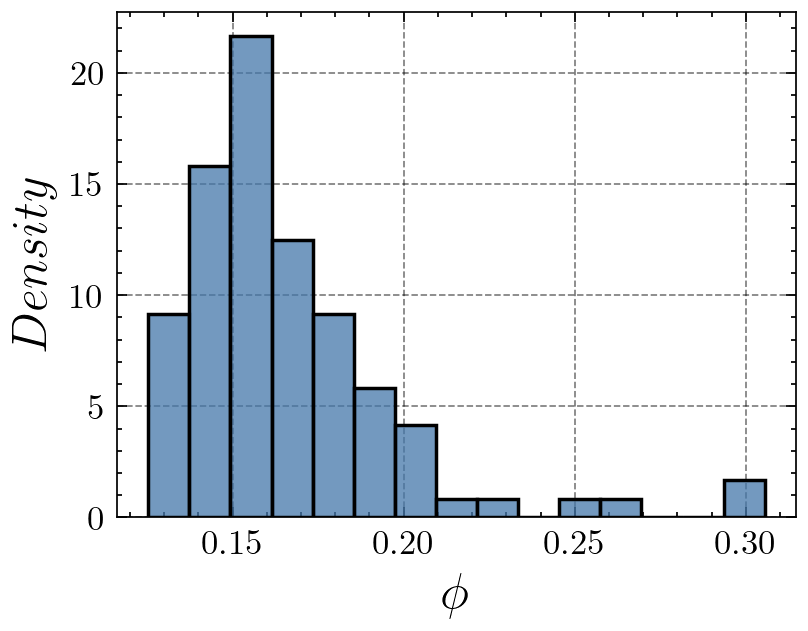

In [83]:
fig = plt.figure(dpi=250)
ax  = fig.add_subplot()
ax  = sns.histplot(phis, stat='density')

ax.set_xlabel("$\phi$", fontsize='x-large')
ax.set_ylabel("$Density$", fontsize='x-large')

fig.savefig(f"../plots/phase_shift.svg", transparent=True)

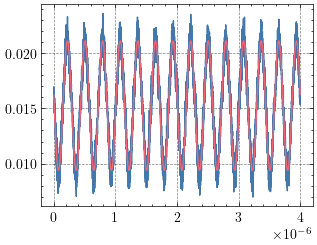

In [86]:
plt.plot(time_vals, y)
plt.plot(time_vals, sin_func(time_vals,*p))

In [19]:
f0  = 3.5*1e6
n_p = 100000
N_f = 5
yff = []
hss = []

for i in range(N_samples):

    y       = dic_sample[i]['Current'].values*1000
    y       = y - np.mean(y)
    xf, yf  = nanonets_utils.fft(signal=y, dt=time_step, n_padded=n_p)
    hs      = nanonets_utils.harmonic_strength(signal=y, f0=f0, dt=time_step, N_f=N_f, n_padded=n_p)
    yff.append(yf)
    hss.append(hs)

h_strength_sample   = pd.DataFrame(hss, columns=np.arange(2,N_f+2))
thd_sample          = np.sqrt(np.sum(np.array(hss)**2, axis=1))
min_sample          = np.argsort(thd_sample)[0]
max_sample          = np.argsort(thd_sample)[-1]
h_strength_sample

,2,3,4,5,6
0,0.031521,0.080547,0.024726,0.019260,0.015649
1,0.039464,0.064459,0.031017,0.008570,0.016402
2,0.138001,0.028641,0.025404,0.013650,0.008148
3,0.067259,0.089079,0.019237,0.006873,0.014499
4,0.039278,0.107450,0.004690,0.017823,0.013399
...,...,...,...,...,...
95,0.133367,0.077685,0.012653,0.022592,0.003677
96,0.199478,0.105522,0.006907,0.020671,0.000774
97,0.085274,0.037564,0.026091,0.023570,0.002736
98,0.108032,0.071995,0.017893,0.008263,0.011699


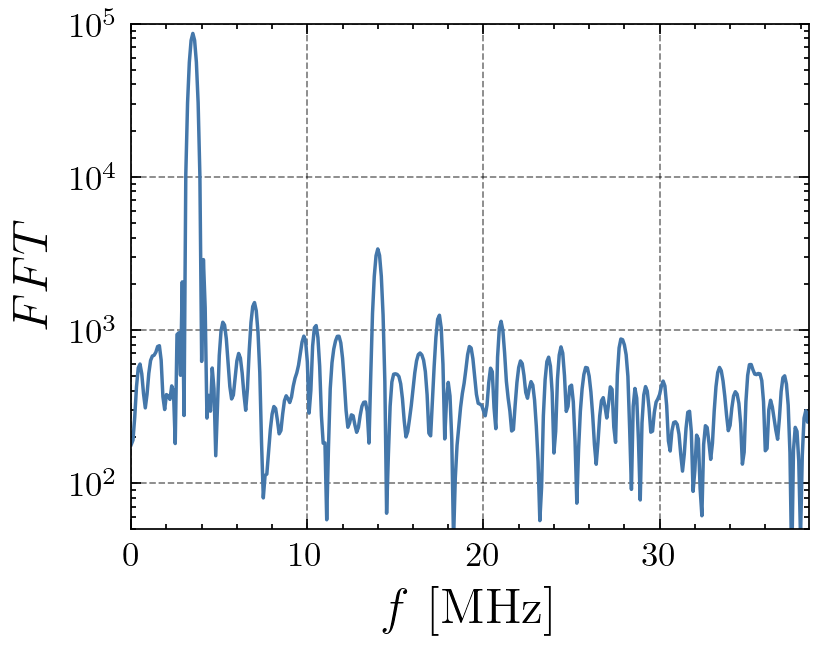

In [252]:
y_min   = 5e1
y_max   = 1e5

fig = plt.figure(dpi=250)
ax  = fig.add_subplot()
ax.plot(xf/1e6, yff[min_sample])

ax.set_xlim(0,11*f0/1e6)
ax.set_yscale('log')
ax.set_ylim(y_min,y_max)
ax.set_xlabel("$f$ [MHz]", fontsize='x-large')
ax.set_ylabel("$FFT$", fontsize='x-large')

fig.savefig(f"../plots/fft_min_sample.svg", transparent=True)

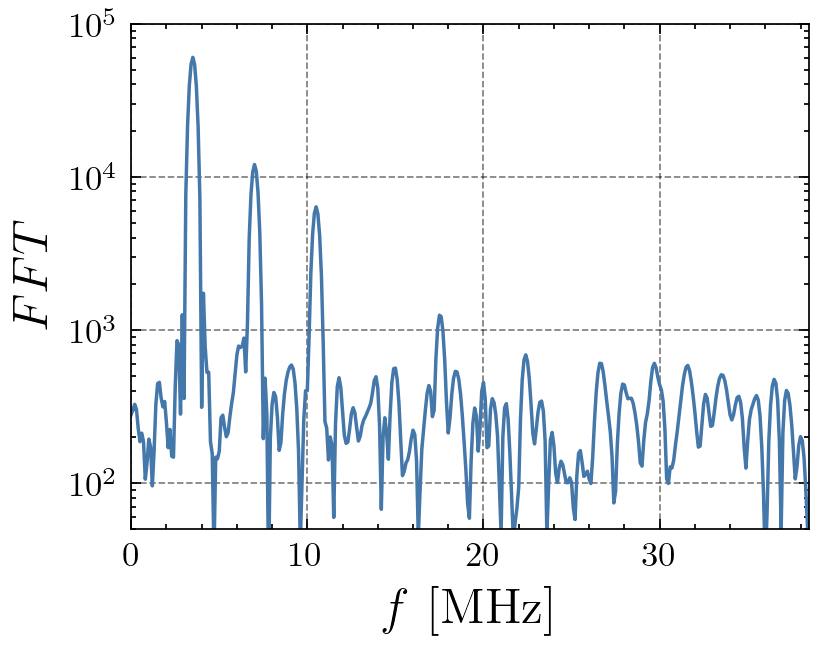

In [253]:
fig = plt.figure(dpi=250)
ax  = fig.add_subplot()
ax.plot(xf/1e6, yff[max_sample])

ax.set_xlim(0,11*f0/1e6)
ax.set_yscale('log')
ax.set_ylim(y_min,y_max)
ax.set_xlabel("$f$ [MHz]", fontsize='x-large')
ax.set_ylabel("$FFT$", fontsize='x-large')

fig.savefig(f"../plots/fft_max_sample.svg", transparent=True)

Text(0, 0.5, '$U_7(t)$ [mV]')

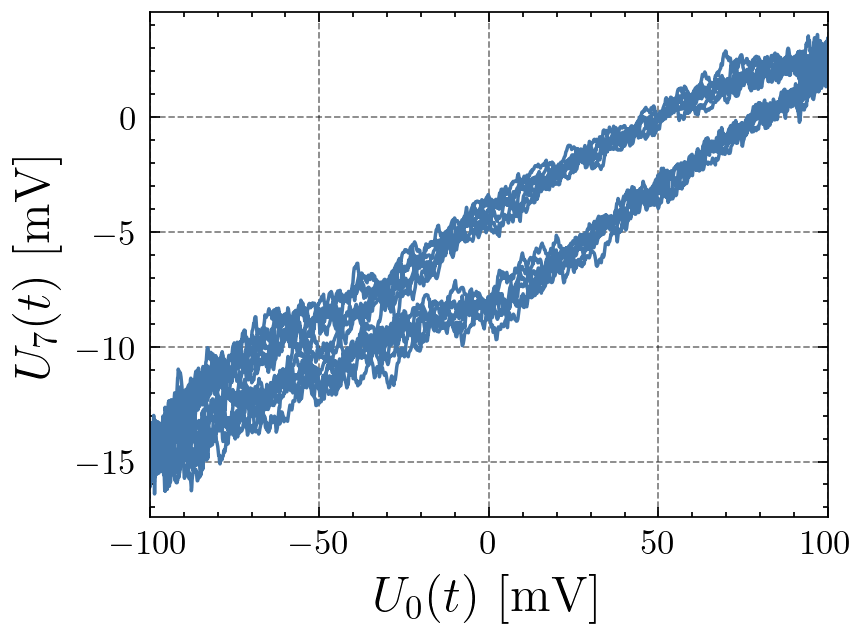

In [254]:
fig = plt.figure(dpi=250)
ax  = fig.add_subplot()
df  = dic_sample[min_sample].iloc[20000:]
ax.plot(df['E0']*1000, df['Current']*1000)
ax.set_xlim(-100,100)
ax.set_xlabel('$U_0(t)$ [mV]', fontsize='x-large')
ax.set_ylabel('$U_7(t)$ [mV]', fontsize='x-large')

# ax.set_xlim(0,11*f0/1e6)
# ax.set_yscale('log')
# ax.set_ylim(y_min,y_max)
# ax.set_xlabel("$f$ [MHz]", fontsize='x-large')
# ax.set_ylabel("$FFT$", fontsize='x-large')

# fig.savefig(f"../plots/phase_space_sample_1.svg", transparent=True)

Text(0, 0.5, '$U_7(t)$ [mV]')

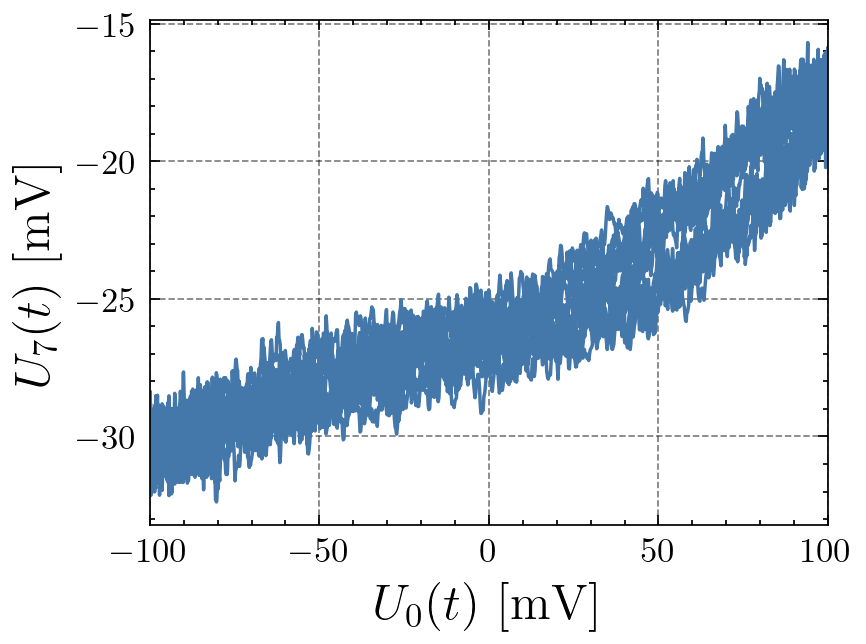

In [255]:
fig = plt.figure(dpi=250)
ax  = fig.add_subplot()
df  = dic_sample[max_sample].iloc[20000:]
ax.plot(df['E0']*1000, df['Current']*1000)
ax.set_xlim(-100,100)
ax.set_xlabel('$U_0(t)$ [mV]', fontsize='x-large')
ax.set_ylabel('$U_7(t)$ [mV]', fontsize='x-large')

# fig.savefig(f"../plots/phase_space_sample_2.svg", transparent=True)

Text(0, 0.5, '$U_7(t)$ [mV]')

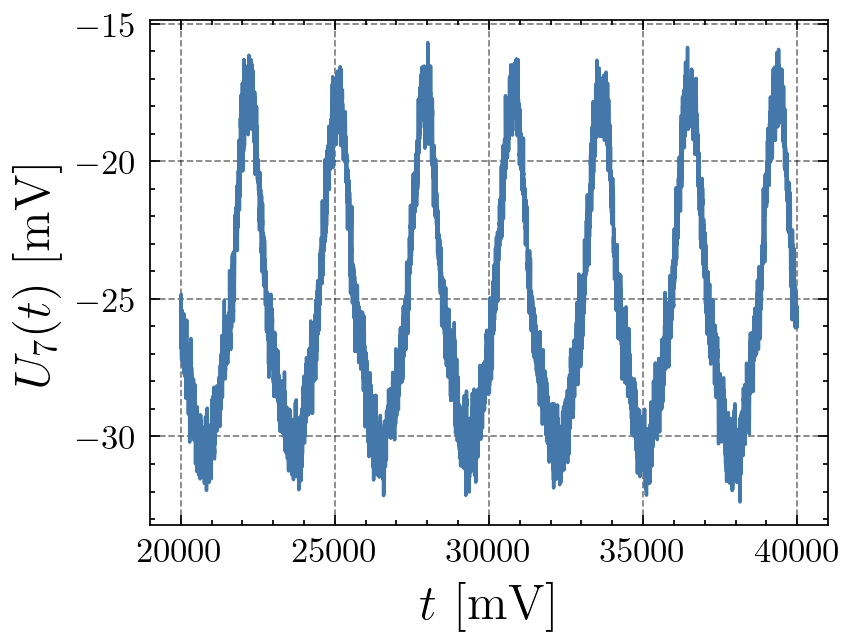

In [257]:
i = max_sample

fig = plt.figure(dpi=250)
ax  = fig.add_subplot()
df  = dic_sample[i].iloc[20000:]
# ax.plot(t_vals[20000:], df['Current']*1000)
ax.plot(df['Current']*1000)
ax.set_xlabel('$t$ [mV]', fontsize='x-large')
ax.set_ylabel('$U_7(t)$ [mV]', fontsize='x-large')

# fig.savefig(f"../plots/phase_space_sample_2.svg", transparent=True)

---

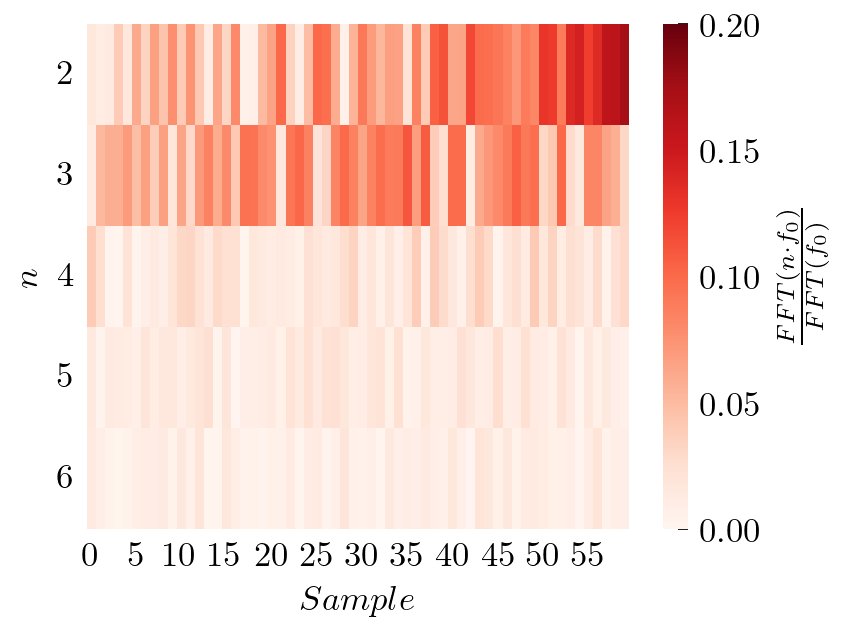

In [191]:
fig = plt.figure(dpi=250)
ax  = fig.add_subplot()
ax  = sns.heatmap(h_strength_sample.iloc[np.argsort(thd_sample),:].reset_index(drop=True).T, cmap='Reds', cbar_kws={"label":"$\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$"}, vmin=0, vmax=0.2)
ax.set_xlabel('$Sample$')
ax.set_ylabel("$n$")
plt.yticks(rotation=0)
fig.savefig(f"../plots/harmonic_strength_sample.svg", transparent=True)

---

In [129]:
# Global
N_voltages  = 50000
N_samples   = 500
time_step   = 1e-10
stat_size   = 100
time_steps  = np.arange(N_voltages)*time_step
folder      = "/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/frequency_modulation/"
# folder      = "/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/frequency_modulation/"

N_p                 = 9
topology_parameter  = {
        "Nx"                : N_p,
        "Ny"                : N_p,
        "Nz"                : 1,
        "e_pos"             : [[(N_p-1)//2,0,0],[0,0,0],[N_p-1,0,0],
                            [0,(N_p-1)//2,0],[N_p-1,(N_p-1)//2,0],
                            [0,N_p-1,0],[N_p-1,N_p-1,0],[(N_p-1)//2,N_p-1,0]],
        "electrode_type"    : ['constant','constant','constant','constant',
                            'constant','constant','constant','constant']
}

# String
frequencies     = [3.5*1e6,0,0,0,0,0,0,0]
amplitudes      = [0.1,0,0,0,0,0,0,0]
offsets         = np.round(np.random.uniform(-0.1,0.1,(N_samples,8)),4)
offsets[:,0]    = 0.0
offsets[:,-1]   = 0.0
N_processes     = 10
procs           = []

offset              = offsets[0,:]
time_steps, volt    = nanonets_utils.sinusoidal_voltages(N_voltages, topology_parameter, amplitudes=amplitudes, frequencies=frequencies, time_step=time_step, offset=offset)

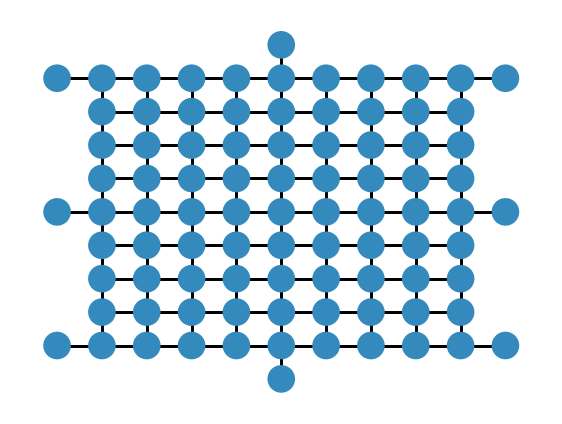

In [131]:
sim_class   = nanonets.simulation(topology_parameter, high_C_output=False)


fig, ax     = plt.subplots(dpi=200)
fig, ax     = nanonets_utils.display_network(sim_class, fig=fig, ax=ax, node_size=80)

fig.savefig("../plots/network.svg", transparent=True, bbox_inches='tight')